In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#### Descriptive Statistics

In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [13]:
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


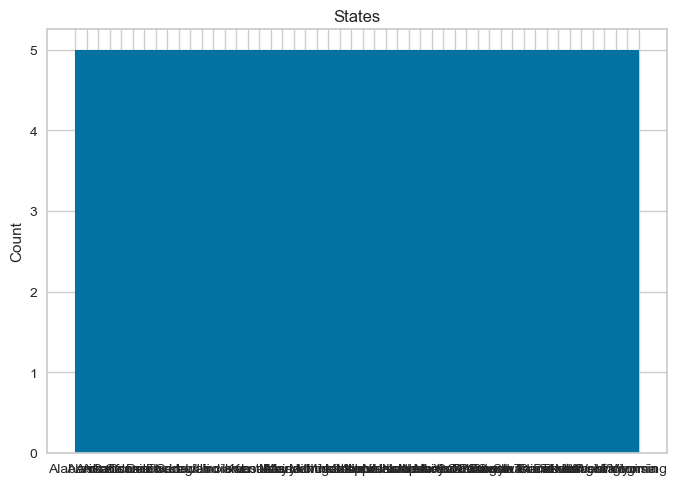

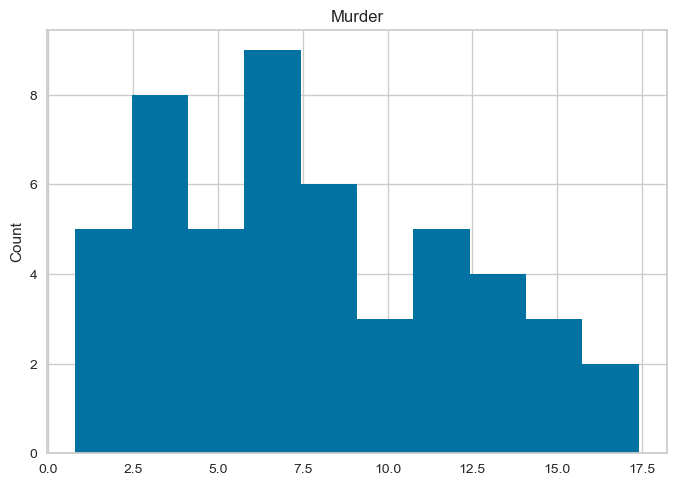

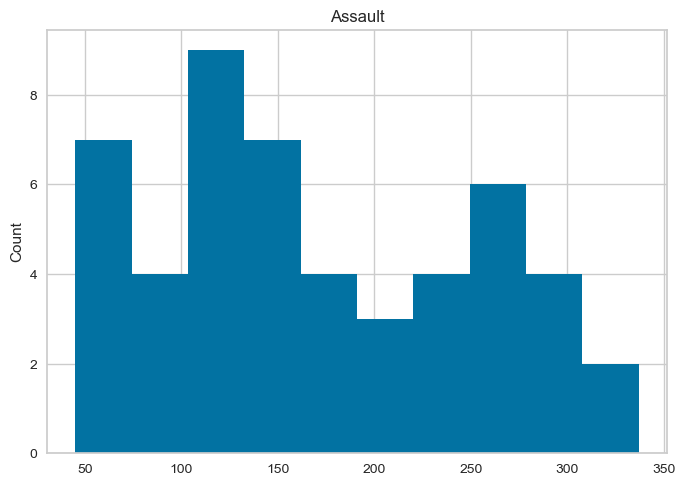

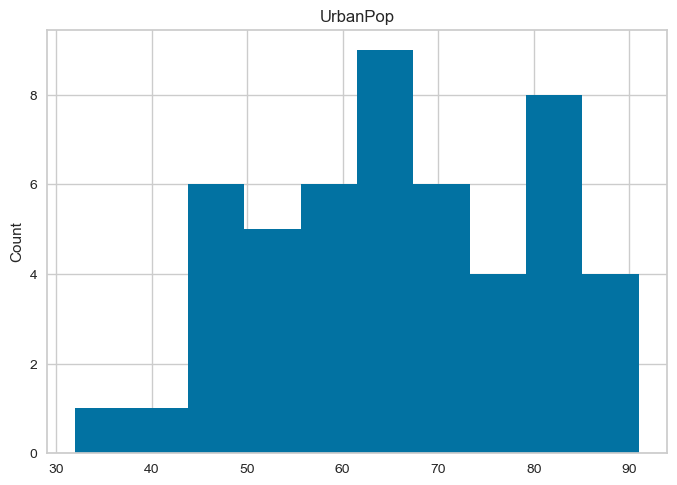

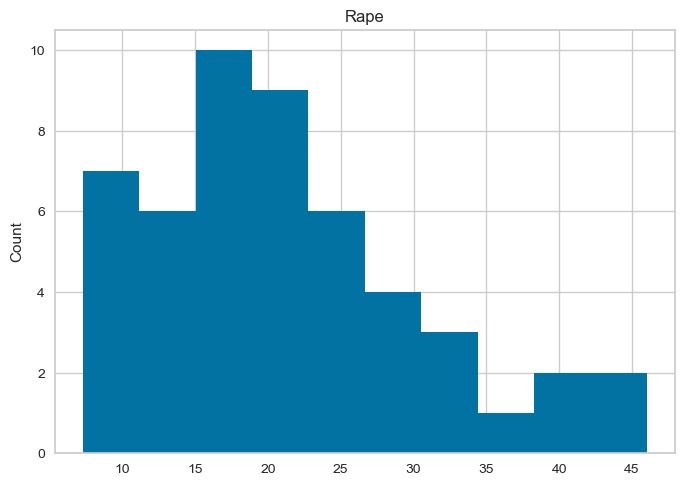

In [14]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

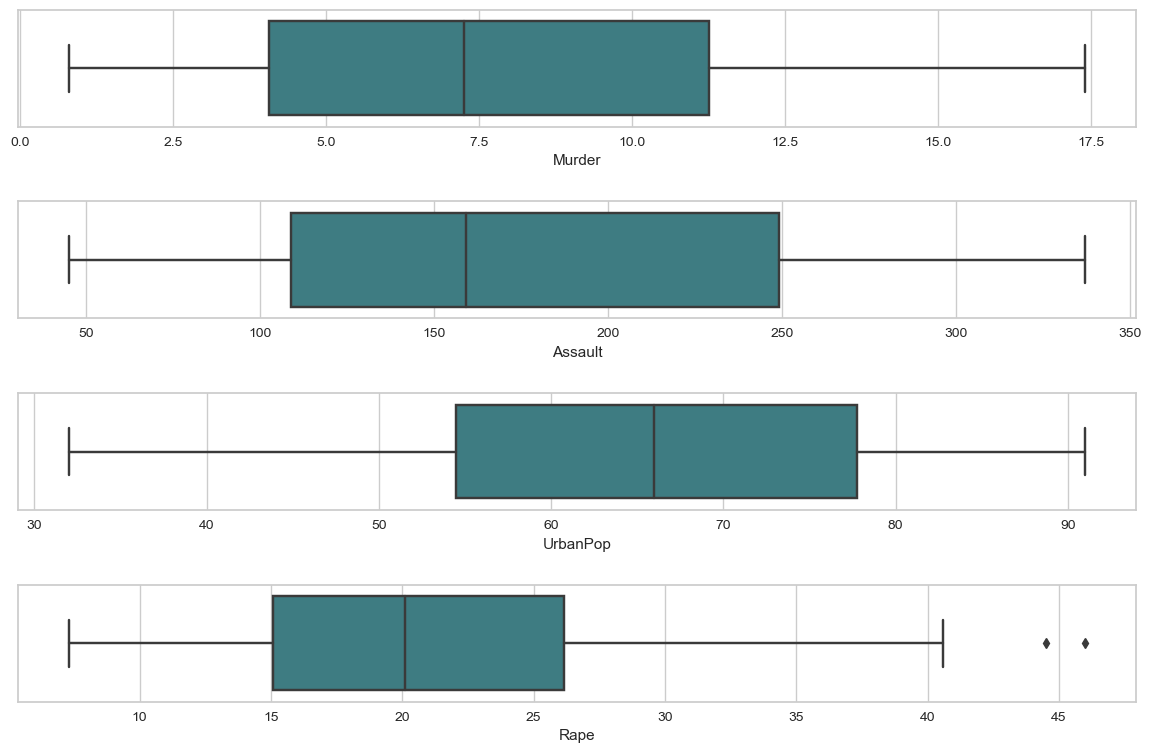

In [17]:
ot=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

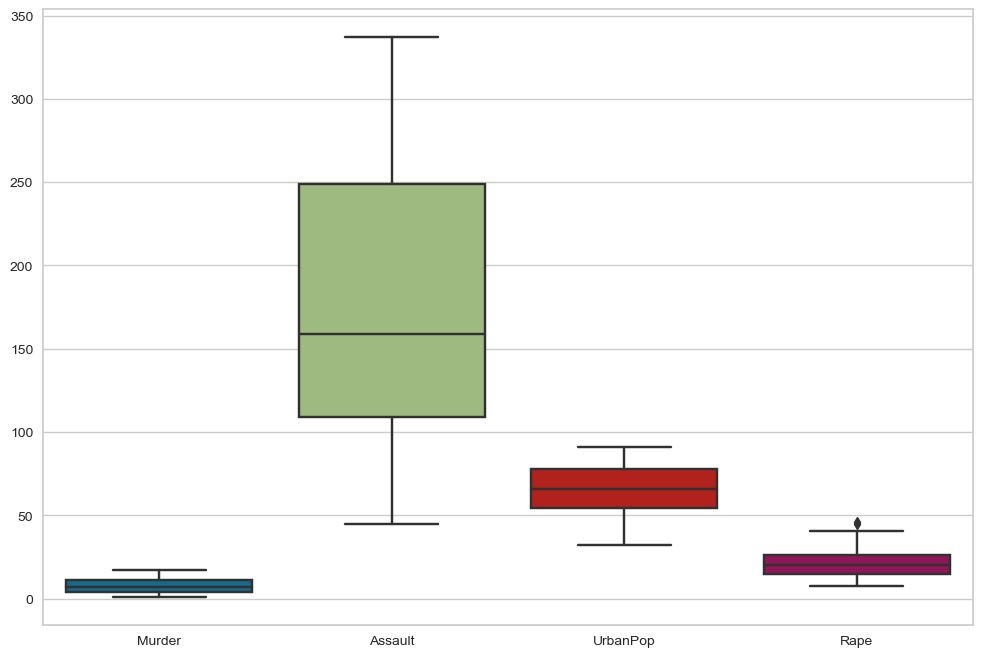

In [18]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

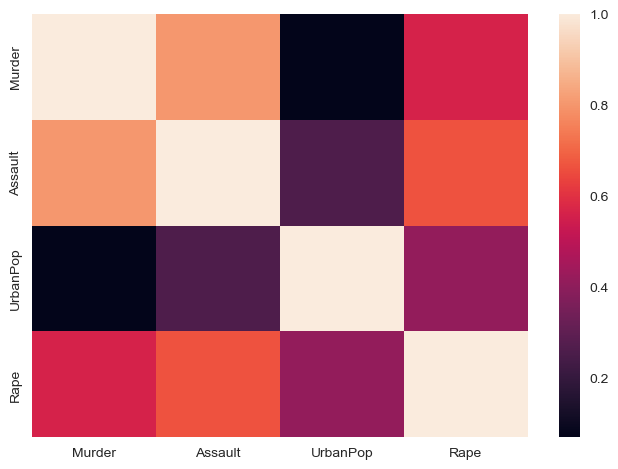

In [30]:
# correlation heatmap
sns.heatmap(data.corr(numeric_only= True))

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


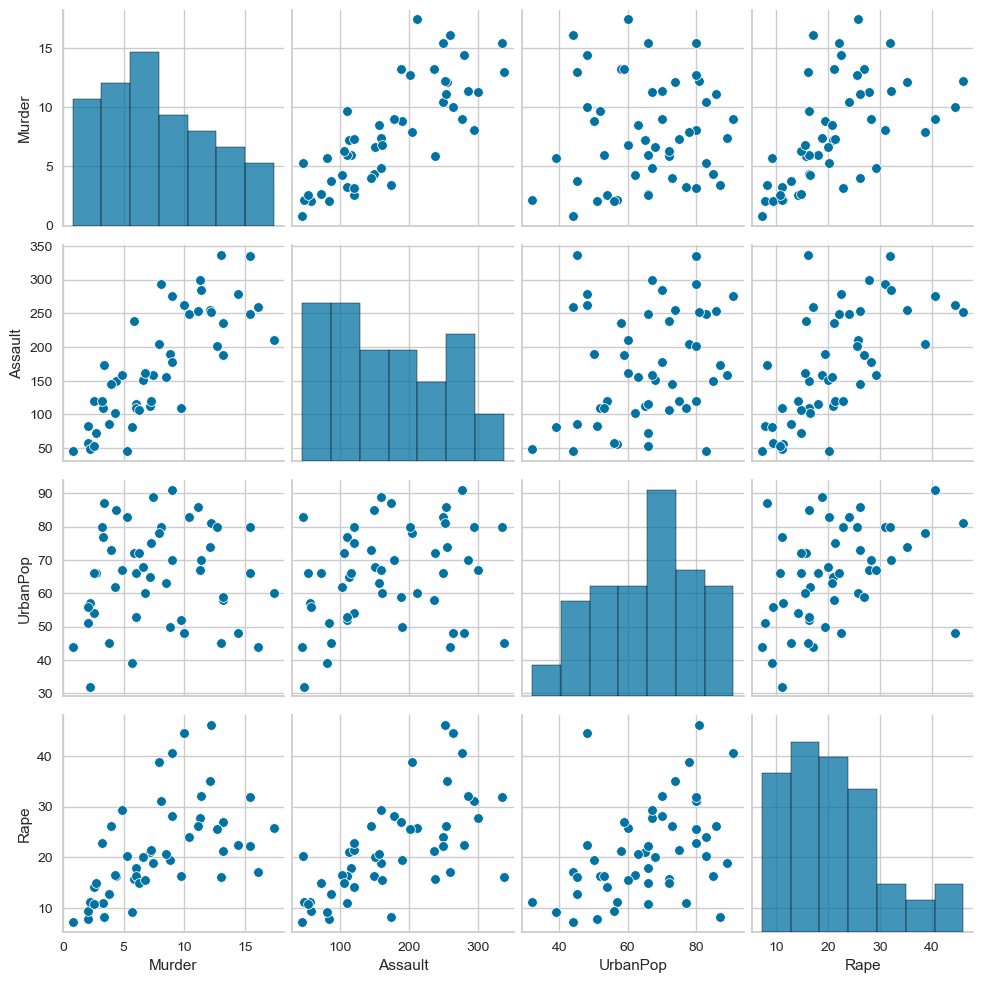

In [31]:
sns.pairplot(data)

Unique points in this correlation matrix:

<ul><li>Assault is positively correlated with Murder </li>
<li>Assualt is positively correlated with Rape </li>
<li>Rape is positively correlated with Murder</li></ul>

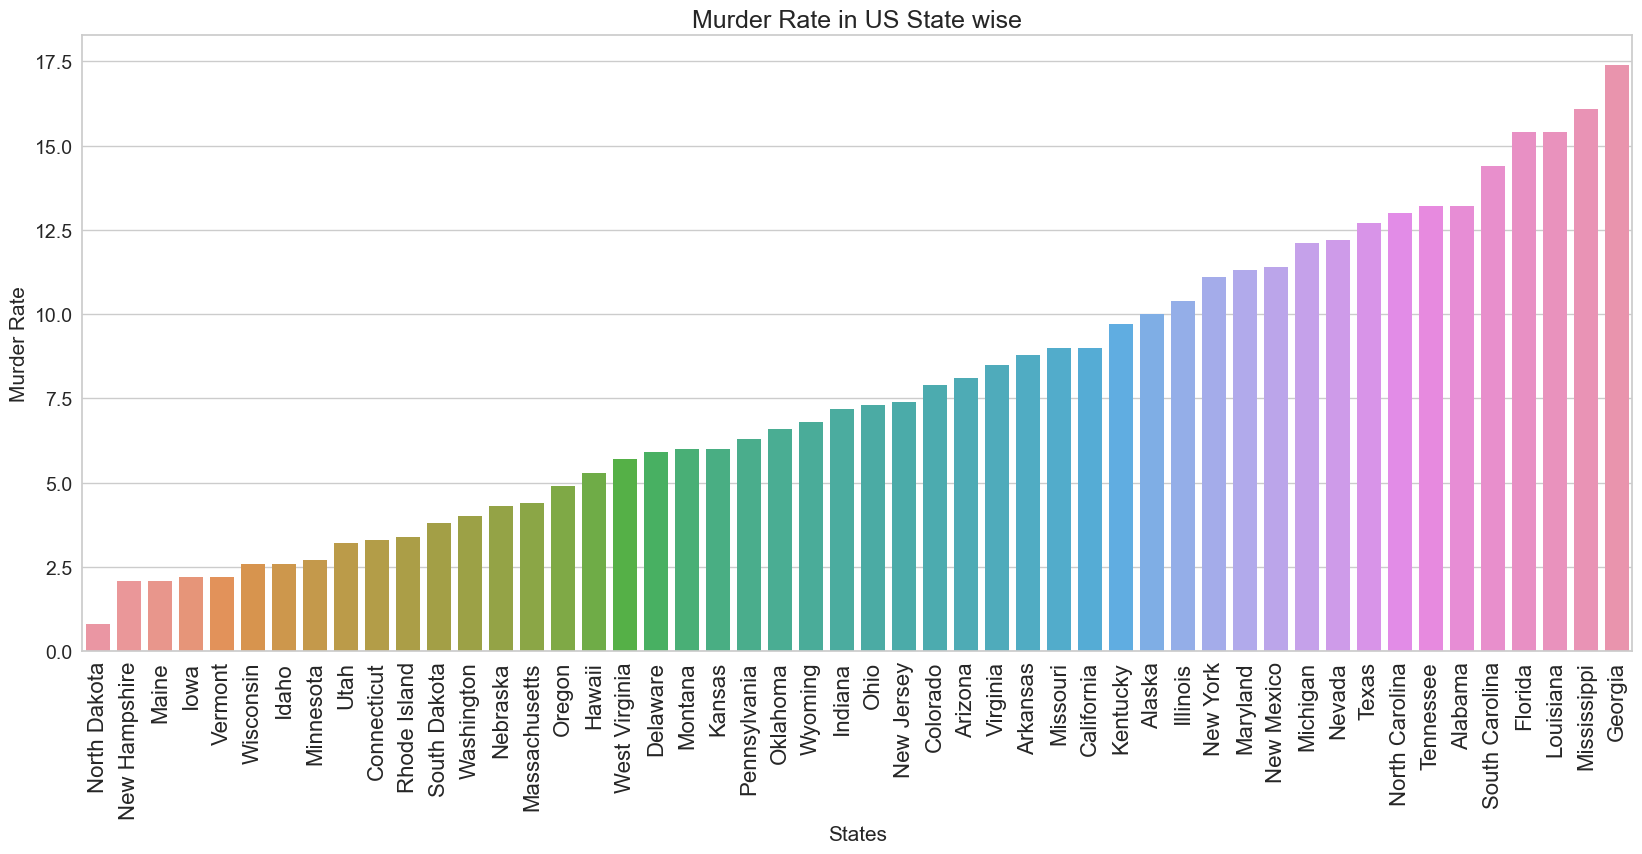

In [33]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Murder", 
            data=data, 
            order=data.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

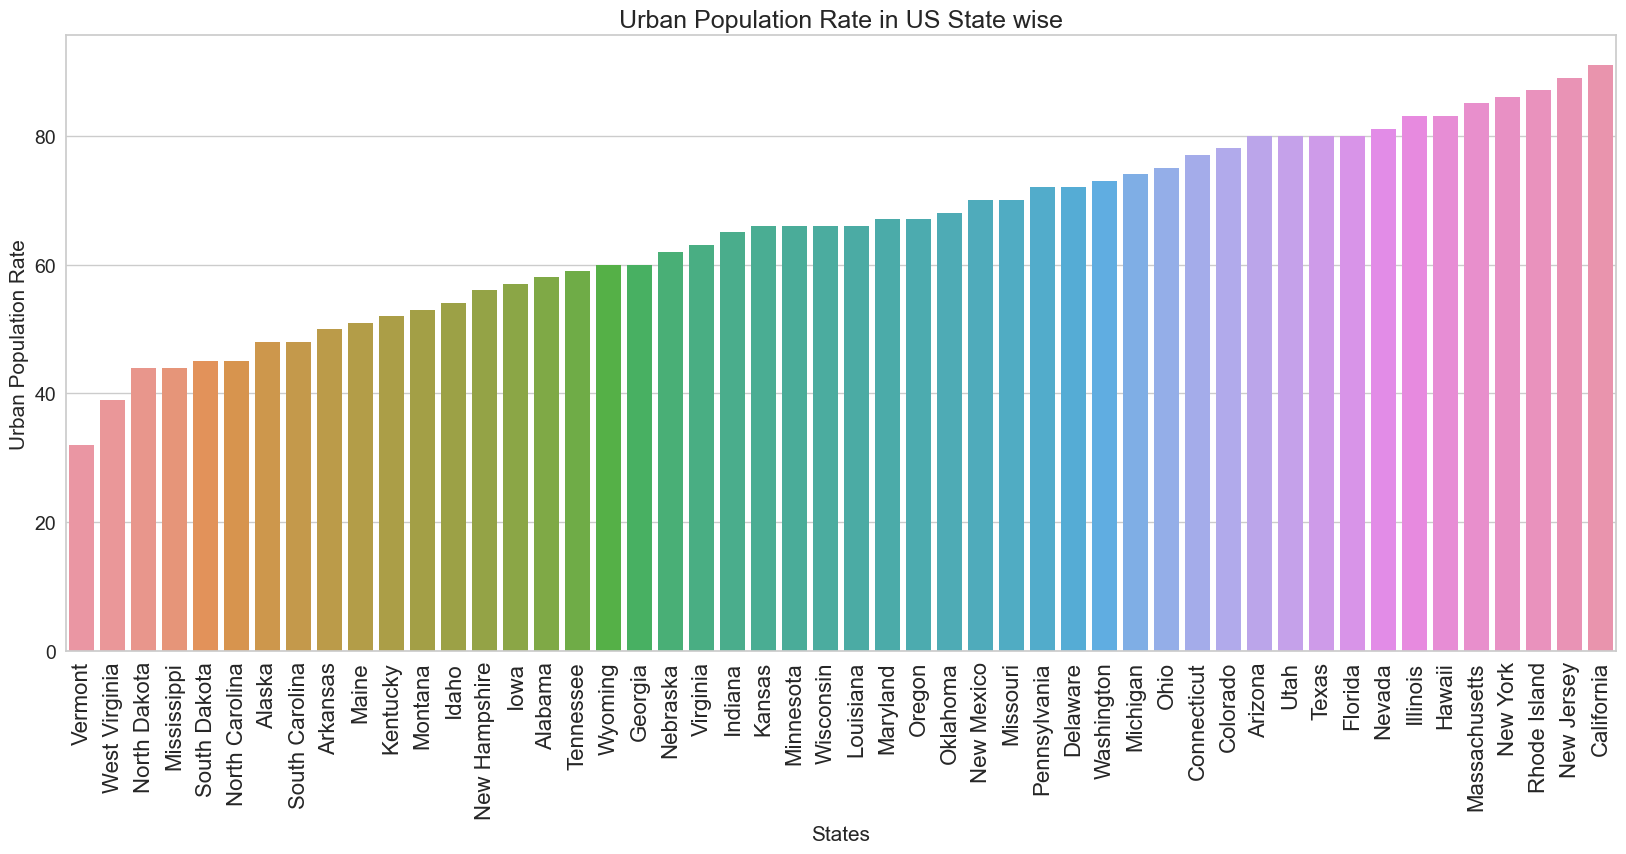

In [34]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

##  Standardizing the Data

In [35]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [36]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

In [40]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.051197
5,6,44.008574
6,7,40.795574
7,8,36.566164
8,9,31.316063
9,10,28.811706


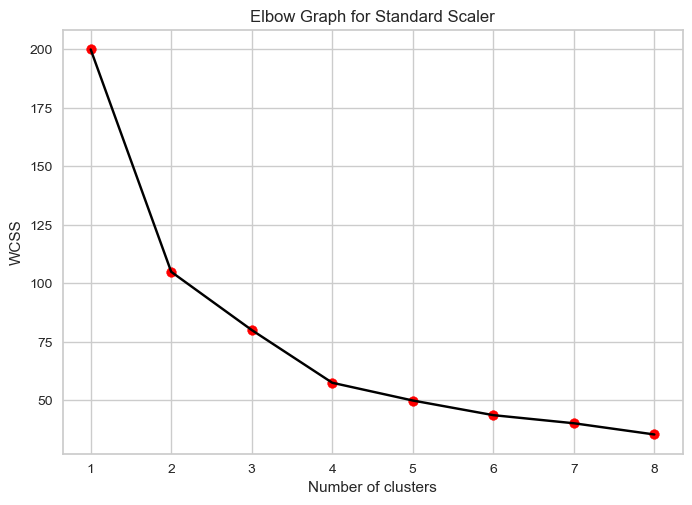

In [41]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.3068468000198128
For n_clusters = 6 The average silhouette_score is : 0.2811951614918648
For n_clusters = 7 The average silhouette_score is : 0.2775072951373062
For n_clusters = 8 The average silhouette_score is : 0.24471865342863663
For n_clusters = 9 The average silhouette_score is : 0.26142196370721515


#### Clustering when k=3

In [43]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [47]:
y_predict_kmeans

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [48]:
model_kmeans.labels_

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [49]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [50]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

80.08569526137276

In [51]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [52]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,12.165000,255.250,68.400000,29.16500
1,5.656250,138.875,73.875000,18.78125
2,3.971429,86.500,51.928571,12.70000


In [53]:
df[df['Kmeans_label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0
Illinois,10.4,249,83,24.0,0
Louisiana,15.4,249,66,22.2,0


In [54]:
df[df['Kmeans_label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Hawaii,5.3,46,83,20.2,1
Indiana,7.2,113,65,21.0,1
Kansas,6.0,115,66,18.0,1
Massachusetts,4.4,149,85,16.3,1
New Jersey,7.4,159,89,18.8,1
Ohio,7.3,120,75,21.4,1
Oklahoma,6.6,151,68,20.0,1


In [55]:
df[df['Kmeans_label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Idaho,2.6,120,54,14.2,2
Iowa,2.2,56,57,11.3,2
Kentucky,9.7,109,52,16.3,2
Maine,2.1,83,51,7.8,2
Minnesota,2.7,72,66,14.9,2
Montana,6.0,109,53,16.4,2
Nebraska,4.3,102,62,16.5,2
New Hampshire,2.1,57,56,9.5,2


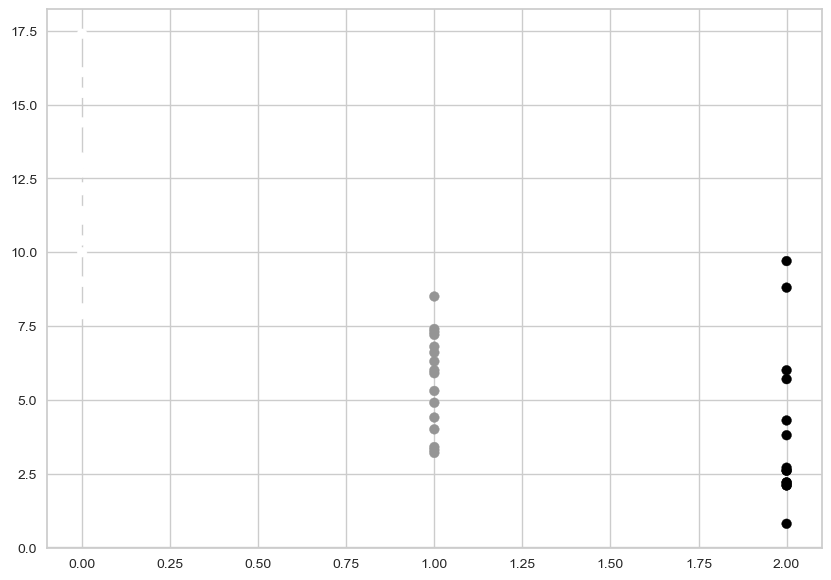

In [63]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Kmeans_label'],df['Murder'], c=model_kmeans.labels_) 

### Clustering when k=2

In [64]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [65]:
# these are nothing but cluster labels...

y_predict_kmeans

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [66]:
model_kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [67]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [68]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

6.596893867946196

In [69]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [70]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


We can now clearly see the 2 number of clusters formed, which can be described as under
<ul><li>Cluster0, Danger Zone Defines the group of Urban States with Highest Rate of Crimes </li>
<li>Cluster1, Safe Zone Defines the group of Urban States with Lowest of Crimes</li></ul>

### Hierarchical Clustering

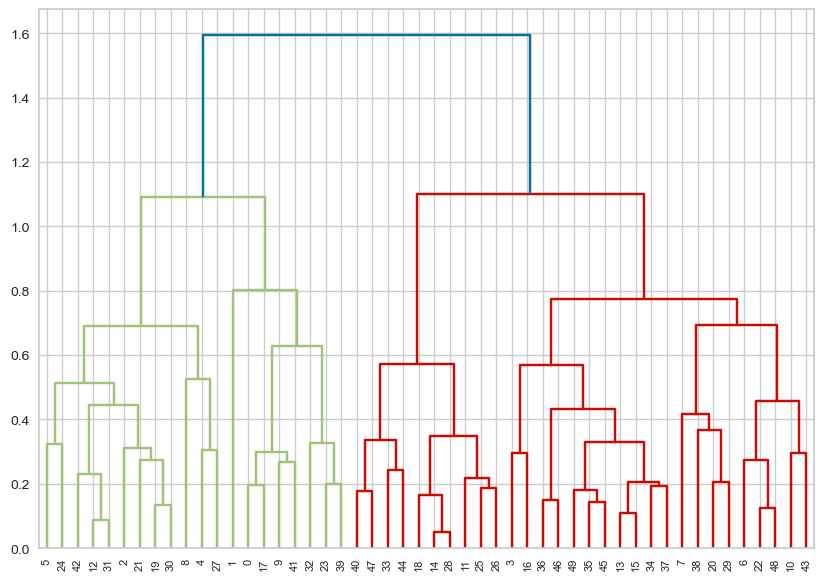

In [71]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(minmax_df,'complete'))

In [72]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
agg_clustering.n_clusters_

2

In [74]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [75]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_

In [76]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,1.0
1,12.165,255.250000,68.400000,29.165000,0.0


### DBSCAN

In [77]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(std_df)

DBSCAN(eps=1, min_samples=4)

In [78]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [92]:
data1

In [93]:
# Adding clusters to dataset
data['clusters']=dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [94]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


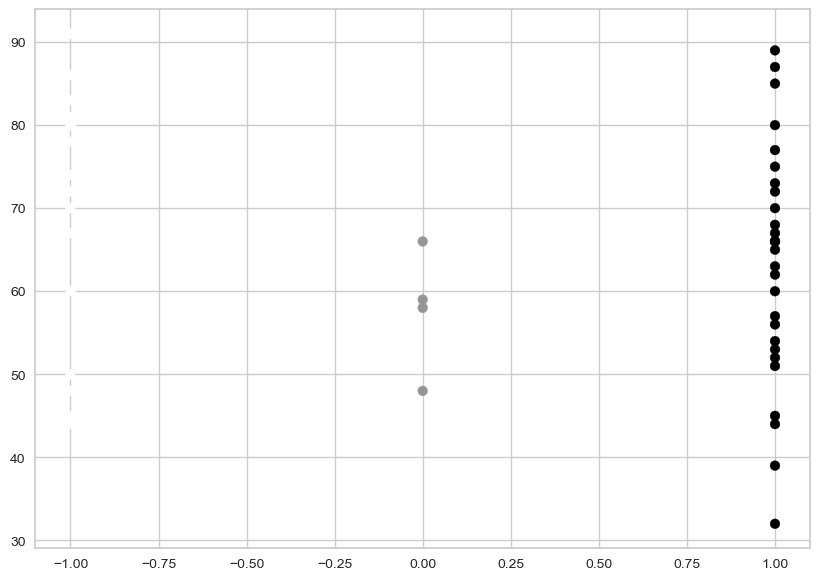

In [96]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'], c=dbscan.labels_) 